## Instance Segmentation to Distance Transform (DT)

In [1]:
import numpy as np
from connectomics.config import get_cfg_defaults
from connectomics.data.dataset.build import _get_input
from connectomics.data.utils import edt_instance

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show(image, cmap='viridis', title='Test Title', interpolation=None):  
    num_imgs = image.shape[0]
    fig = plt.figure(figsize=(20., 3.))
    fig.suptitle(title, fontsize=15)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_imgs),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    image_list = np.split(image, num_imgs, 0)
    for ax, im in zip(grid, [np.squeeze(x) for x in image_list]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap=cmap, interpolation=interpolation)
        ax.axis('off')

    plt.show()

In [3]:
# Load configs and dataset
cfg_filename = '../configs/SNEMI/SNEMI-Base.yaml' # should be in the configs/ directory
cfg = get_cfg_defaults()
cfg.merge_from_file(cfg_filename)
cfg.DATASET.PAD_SIZE = [0,0,0]
cfg.DATASET.INPUT_PATH = "../datasets/SNEMI3D/"

images, labels, _ = _get_input(cfg, 'train')
image = np.array(images[0])
label = np.array(labels[0])

None 1 ['train_image.h5']
volume shape (original): (100, 1024, 1024)
volume shape (after scaling and padding): (100, 1024, 1024)
label shape (after scaling and padding): (100, 1024, 1024)


In [4]:
# crop a subvolume for visualization
label_vol = label[50:58, 400:657, 400:657]
image_vol = image[50:58, 400:657, 400:657]

In [5]:
edt_c = edt_instance(label_vol, padding = False, quantize = False)
edt_q = edt_instance(label_vol, padding = False, quantize = True)
edt_c_pad = edt_instance(label_vol, padding = True, quantize = False)
edt_q_pad = edt_instance(label_vol, padding = True, quantize = True)

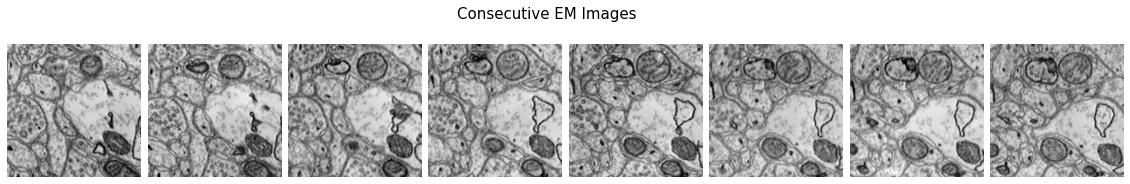

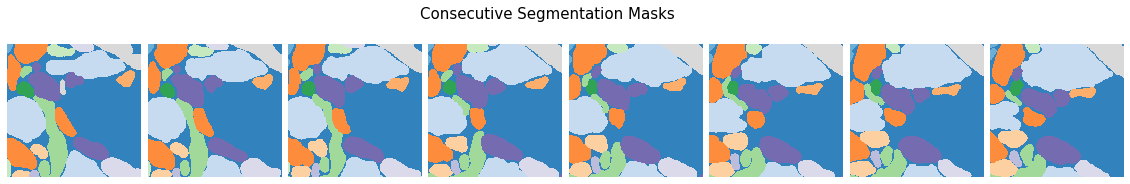

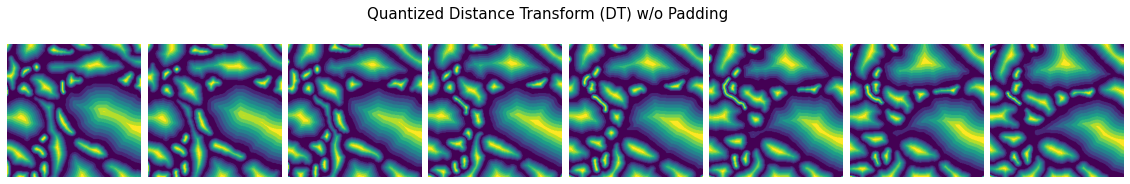

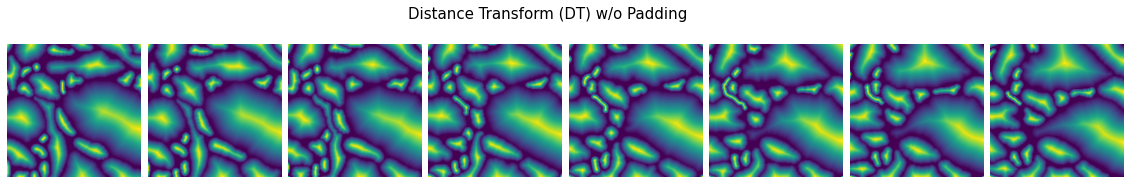

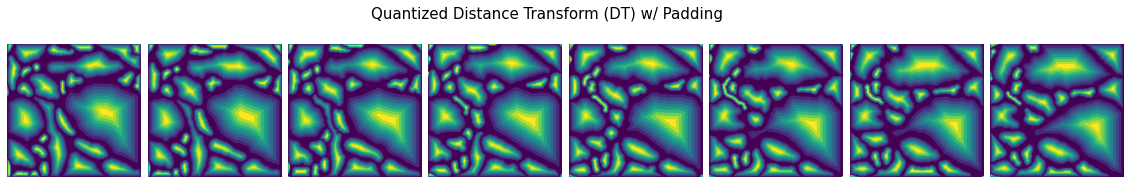

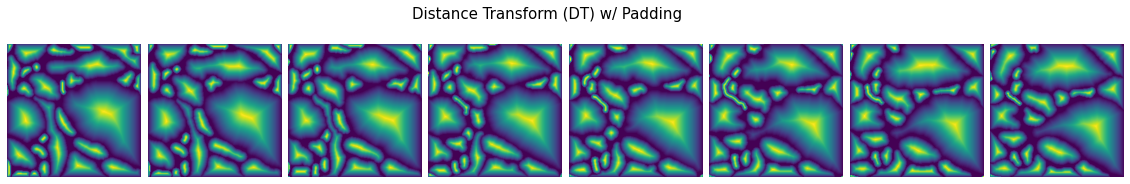

In [6]:
show(image_vol, title = 'Consecutive EM Images', cmap = "gray")
show(label_vol, title = 'Consecutive Segmentation Masks', cmap = "tab20c", interpolation="none")
show(edt_q, title = 'Quantized Distance Transform (DT) w/o Padding')
show(edt_c, title = 'Distance Transform (DT) w/o Padding')
show(edt_q_pad, title = 'Quantized Distance Transform (DT) w/ Padding')
show(edt_c_pad, title = 'Distance Transform (DT) w/ Padding')